# Breast Cancer Data Analysis by analysing cell reproduction activity 
Using two different data sets .

Understand the significance of each of 9 inputs: clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli,  

# Part 1


In [1]:
#importing the require libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


In [2]:
#loading the two datasets using pandas library
#passing function validate_file_csv to enter and check the CSV file from any location from the system .
import re

def validate_file_csv(filepath):
  validate_file = re.search('.csv$',filepath)
  if not validate_file:
    raise Exception("File name or extension not valid")
  return filepath

try:
  print("Enter the path of file 1")
  file1 = input()
  validate_file1 = validate_file_csv(file1)
  print("Enter the path of file 2")
  file2 = input()
  print('this is file',file1)
  validate_file2 = validate_file_csv(file2)
  print('this is file',validate_file2)
    
except Exception as e:
  print(e)


validate_file1 =pd.read_csv(file1)
validate_file2 =pd.read_csv(file2)
df_breast_cancer_data=validate_file1
df_breast_cancer_data_new=validate_file2
df_1=df_breast_cancer_data
df_2=df_breast_cancer_data_new

Enter the path of file 1
C:\Users\raj\Documents\breast_cancer_dataset.csv
Enter the path of file 2
C:\Users\raj\wisconsin_breast_cancer.csv
this is file C:\Users\raj\Documents\breast_cancer_dataset.csv
this is file C:\Users\raj\wisconsin_breast_cancer.csv


In [3]:
#finding the data info , type, missing values, unique values of two datasets 
#passing the get_df_info method to perfrom the datapreprocessing 
def get_df_info(df, include_unique_values=False):
    col_name_list = list(df.columns)
    col_type_list = [type(cell) for cell in df.iloc[0, :]]
    col_null_count_list = [df[col].isnull().sum() for col in col_name_list]
    col_unique_count_list = [df[col].nunique() for col in col_name_list]
    col_memory_usage_list = [df[col].memory_usage() for col in col_name_list]
    df_total_memory_usage = sum(col_memory_usage_list) / 1048576
    if include_unique_values:
        col_unique_list = [df[col].unique() for col in col_name_list]
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list, 
                                'unique_values': col_unique_list})
    else:
        df_info = pd.DataFrame({'column_name': col_name_list, 'type': col_type_list, 
                                'null_count': col_null_count_list, 'nunique': col_unique_count_list})
    return df_info, df_total_memory_usage

In [4]:
df_breast_cancer_data_info,df_breast_cancer_data_mem = get_df_info(df_breast_cancer_data, include_unique_values=True)
print('{} has {} rows and {} cols, uses approx. {:.2f} MB'.format('df_breast_cancer_data', df_breast_cancer_data.shape[0], 
                                                                  df_breast_cancer_data.shape[1], df_breast_cancer_data_mem))
df_breast_cancer_data_info

df_breast_cancer_data has 569 rows and 10 cols, uses approx. 0.04 MB


,column_name,type,null_count,nunique,unique_values
0,clump_thickness,<class 'int'>,0,10,"[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]"
1,uniformity_of_cell_size,<class 'int'>,0,10,"[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]"
2,uniformity_of_cell_shape,<class 'int'>,0,10,"[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]"
3,marginal_adhesion,<class 'int'>,0,10,"[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]"
4,single_epithelial_cell_size,<class 'int'>,0,10,"[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]"
5,bare_nuclei,<class 'int'>,0,11,"[1, 10, 2, 4, 3, 9, 7, -100000, 5, 8, 6]"
6,bland_chromatin,<class 'int'>,0,10,"[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]"
7,normal_nucleoli,<class 'int'>,0,10,"[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]"
8,mitosis,<class 'int'>,0,9,"[1, 5, 4, 2, 3, 7, 10, 8, 6]"
9,classes,<class 'int'>,0,2,"[2, 4]"


In [5]:
#droping the id column to get better visualization in dataset2# user has to drop any columns 
df_breast_cancer_data_new =df_breast_cancer_data_new.drop(['id'] , axis = 1)

In [6]:
#removing missing values # what missng values 
df_breast_cancer_data_new.dropna(inplace=True)

In [7]:
# creating a function to change the type of data from float to int . 
def change_column_int(new_df):
  new_df = df_breast_cancer_data_new.copy(deep=True) # change the name 
  # get coloumns of df in dict
  columns_dict = dict(new_df.dtypes)
  #print(columns_dict)
  for k in columns_dict:
    # ilterate over columns
    if columns_dict[k] == 'float64':
      new_df[k]=df_breast_cancer_data_new[k].astype('int')
  return new_df
# Data preprocessing to get data frame
df_breast_cancer_data_new=change_column_int(df_breast_cancer_data_new )

df_breast_cancer_data_new_info,df_breast_cancer_data_new_mem = get_df_info(df_breast_cancer_data_new, include_unique_values=True)
print('{} has {} rows and {} cols, uses approx. {:.2f} MB'.format('df_breast_cancer_data_new', df_breast_cancer_data_new.shape[0], df_breast_cancer_data_new.shape[1],df_breast_cancer_data_new_mem))
                                                                  
df_breast_cancer_data_new_info 

df_breast_cancer_data_new has 683 rows and 10 cols, uses approx. 0.30 MB


,column_name,type,null_count,nunique,unique_values
0,thickness,<class 'int'>,0,10,"[5, 3, 6, 4, 8, 1, 2, 7, 10, 9]"
1,size,<class 'int'>,0,10,"[1, 4, 8, 10, 2, 3, 7, 5, 6, 9]"
2,shape,<class 'int'>,0,10,"[1, 4, 8, 10, 2, 3, 5, 6, 7, 9]"
3,adhesion,<class 'int'>,0,10,"[1, 5, 3, 8, 10, 4, 6, 2, 9, 7]"
4,single,<class 'int'>,0,10,"[2, 7, 3, 1, 6, 4, 5, 8, 10, 9]"
5,nuclei,<class 'int'>,0,10,"[1, 10, 2, 4, 3, 9, 7, 5, 8, 6]"
6,chromatin,<class 'int'>,0,10,"[3, 9, 1, 2, 4, 5, 7, 8, 6, 10]"
7,nucleoli,<class 'int'>,0,10,"[1, 2, 7, 4, 5, 3, 10, 6, 9, 8]"
8,mitosis,<class 'int'>,0,9,"[1, 5, 4, 2, 3, 7, 10, 8, 6]"
9,classes,<class 'int'>,0,2,"[0, 1]"


In [8]:
#passing the custom_comparator fuction to compare the two dataframes and finding the match columns 
 
def custom_comparator(dfc_1, dfc_2):
    dfc_1 = df_breast_cancer_data
    dfc_2 =df_breast_cancer_data_new
    matched  = dfc_1.equals(dfc_2)
    print('Matches:', matched)
    return matched
custom_comparator(df_1, df_2)

Matches: False


False

In [9]:
#passing comparator_columns functions to find wether the vaules of columns of datasets are equal
def comparator_columns(dfc_1,dfc_2): # everything tha needs to be as a chice 
    dfc_1 = df_breast_cancer_data
    dfc_2 =df_breast_cancer_data_new
    matched_columns = dfc_1.eq(dfc_2)
    mt=matched_columns.all()
    return mt
comparator_columns(df_1,df_2)

adhesion                       False
bare_nuclei                    False
bland_chromatin                False
chromatin                      False
classes                        False
clump_thickness                False
marginal_adhesion              False
mitosis                        False
normal_nucleoli                False
nuclei                         False
nucleoli                       False
shape                          False
single                         False
single_epithelial_cell_size    False
size                           False
thickness                      False
uniformity_of_cell_shape       False
uniformity_of_cell_size        False
dtype: bool

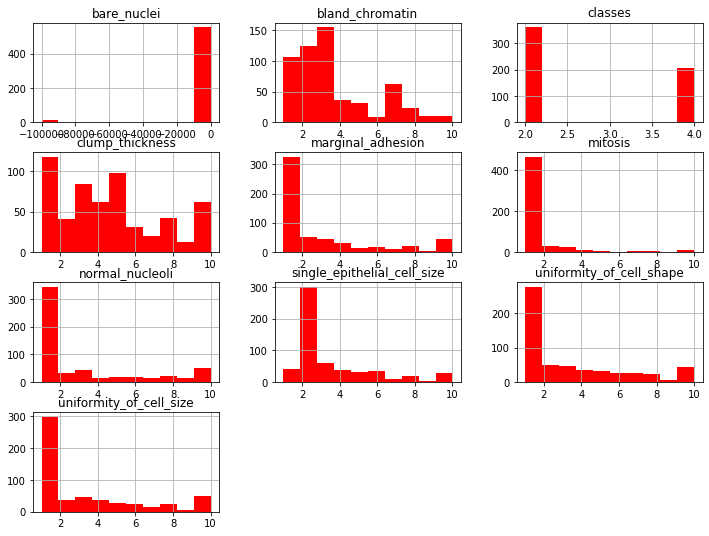

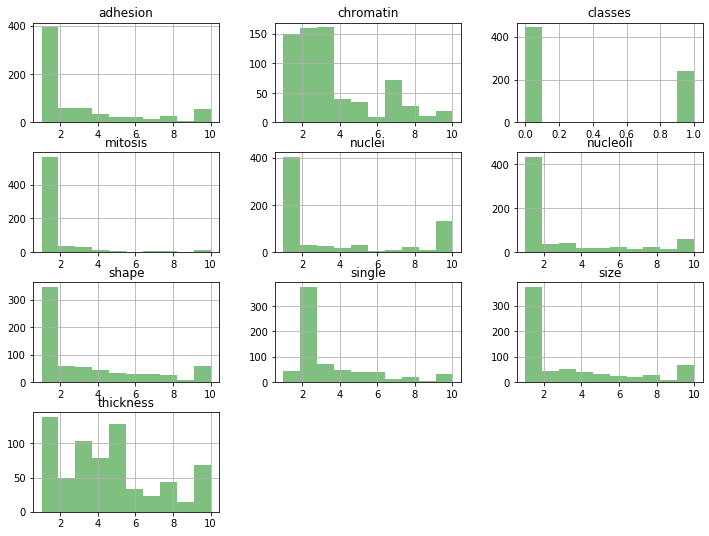

<Figure size 432x288 with 0 Axes>

In [10]:
#plotting the histogram of data set 1 and dataset 2
def plot_histogram(dfc_1 , dfc_2):
    dfc_1=df_breast_cancer_data.hist( color ='r',figsize = (12,9),bins = 10 )
    dfc_2=df_breast_cancer_data_new.hist( color ='g',alpha = 0.5,figsize = (12,9),bins =10 )
    plt.show()
    plt.subplots_adjust(bottom=0.50, left=0.10)
plot_histogram(df_1,df_2)


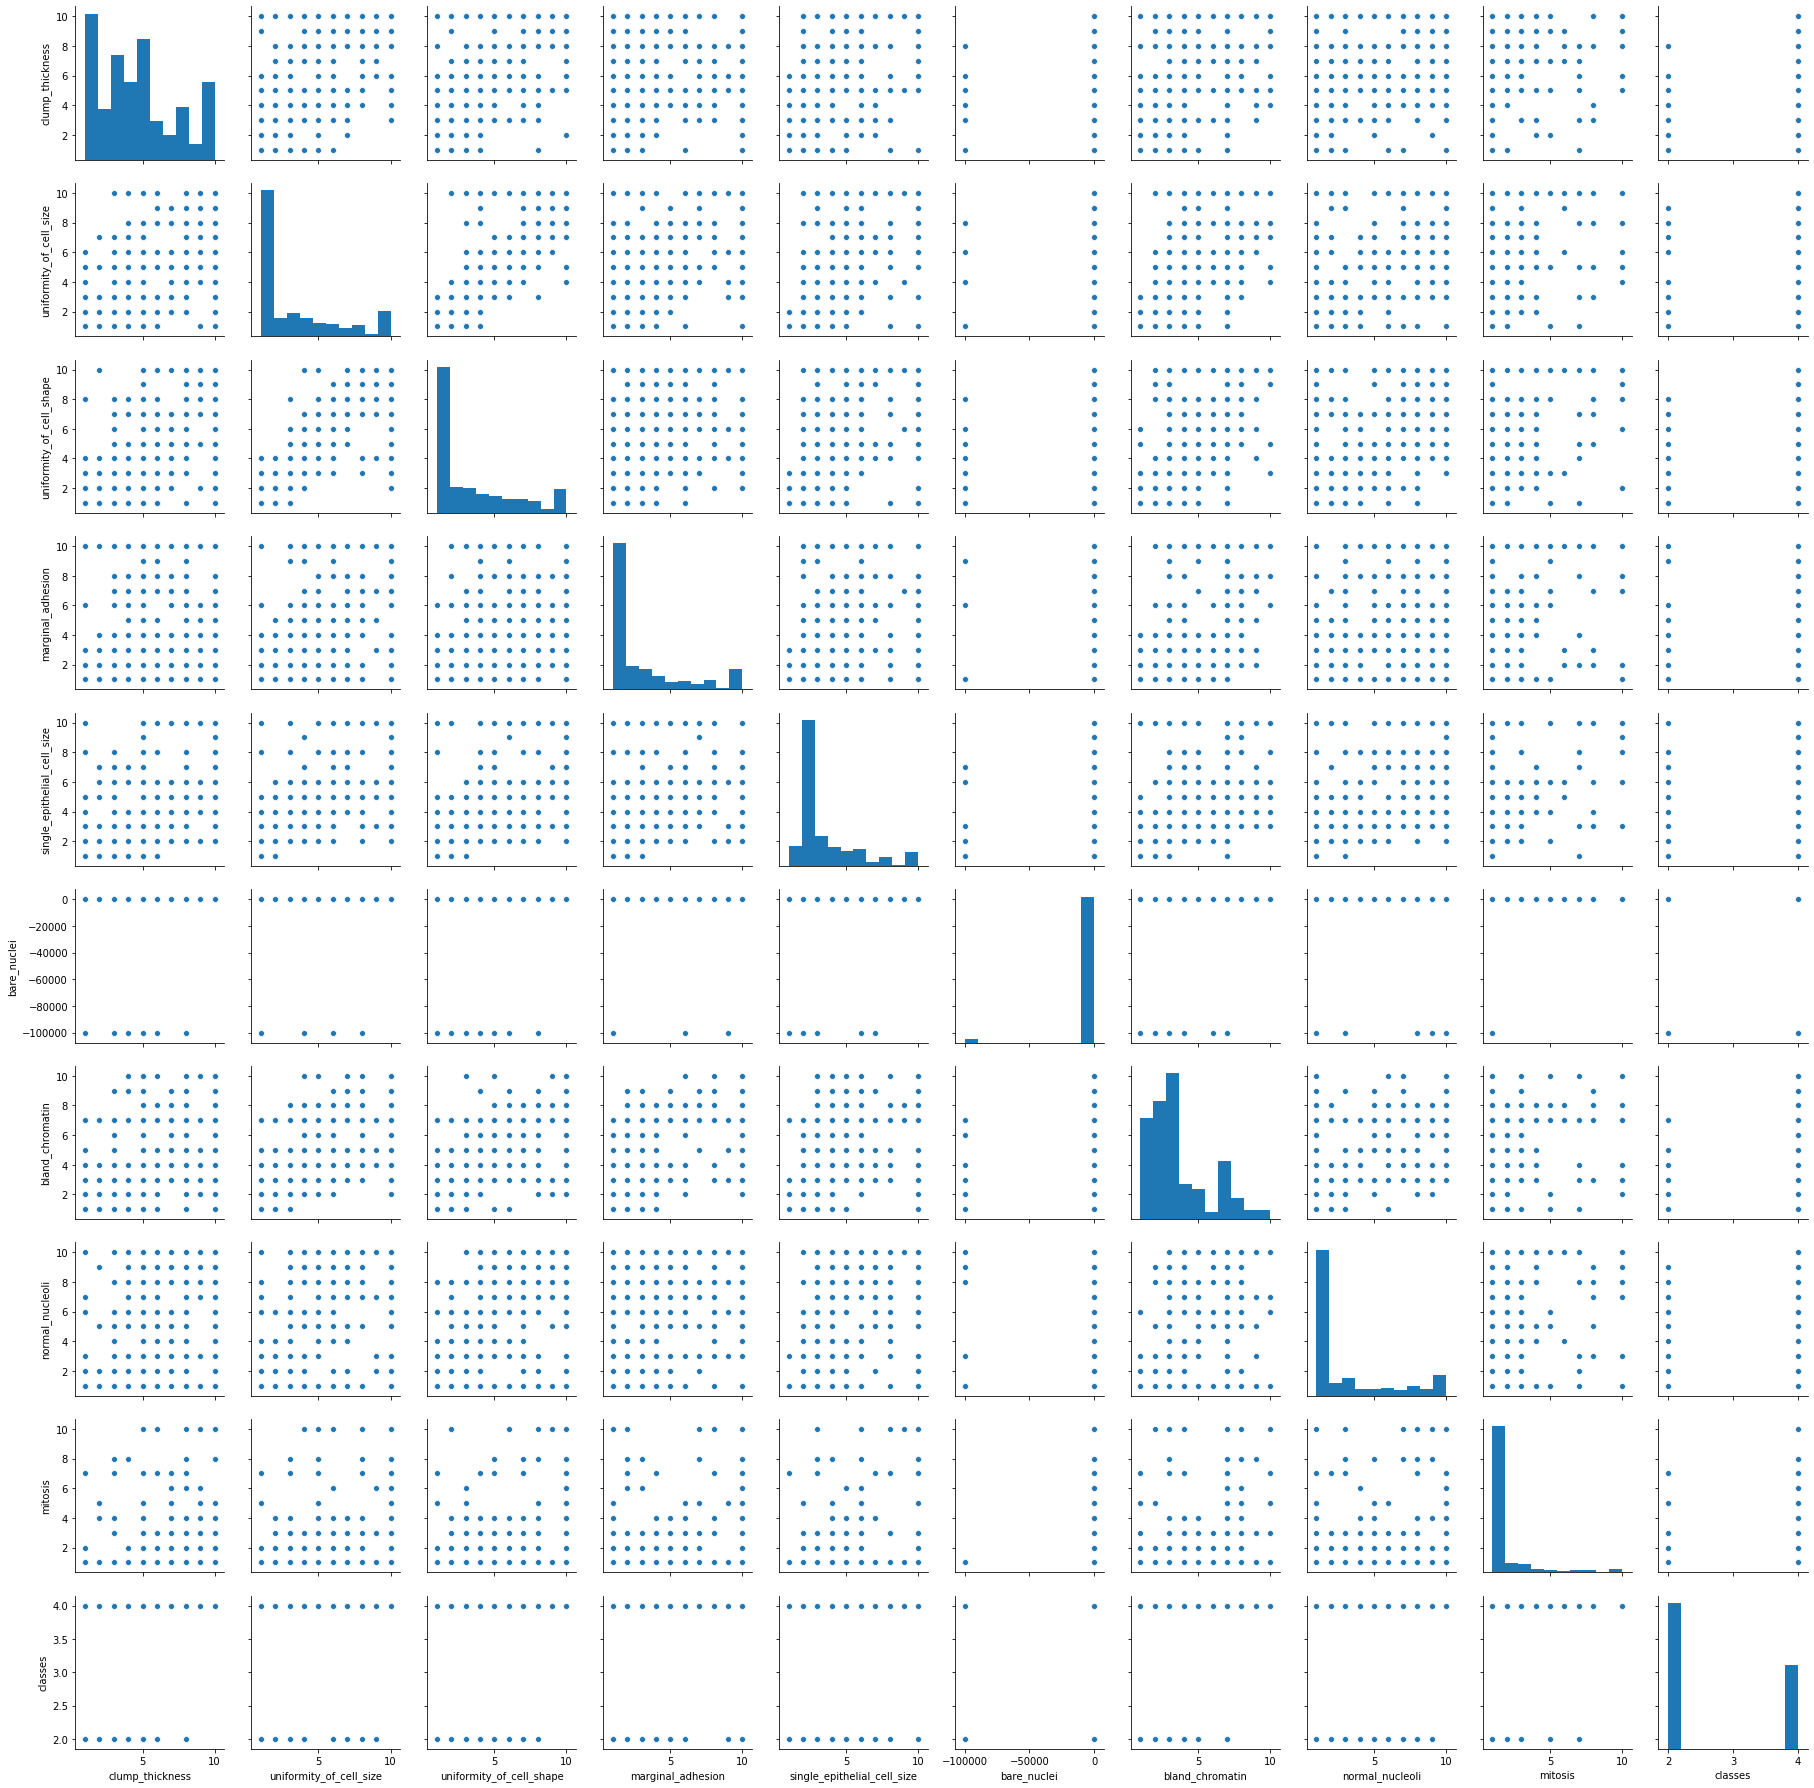

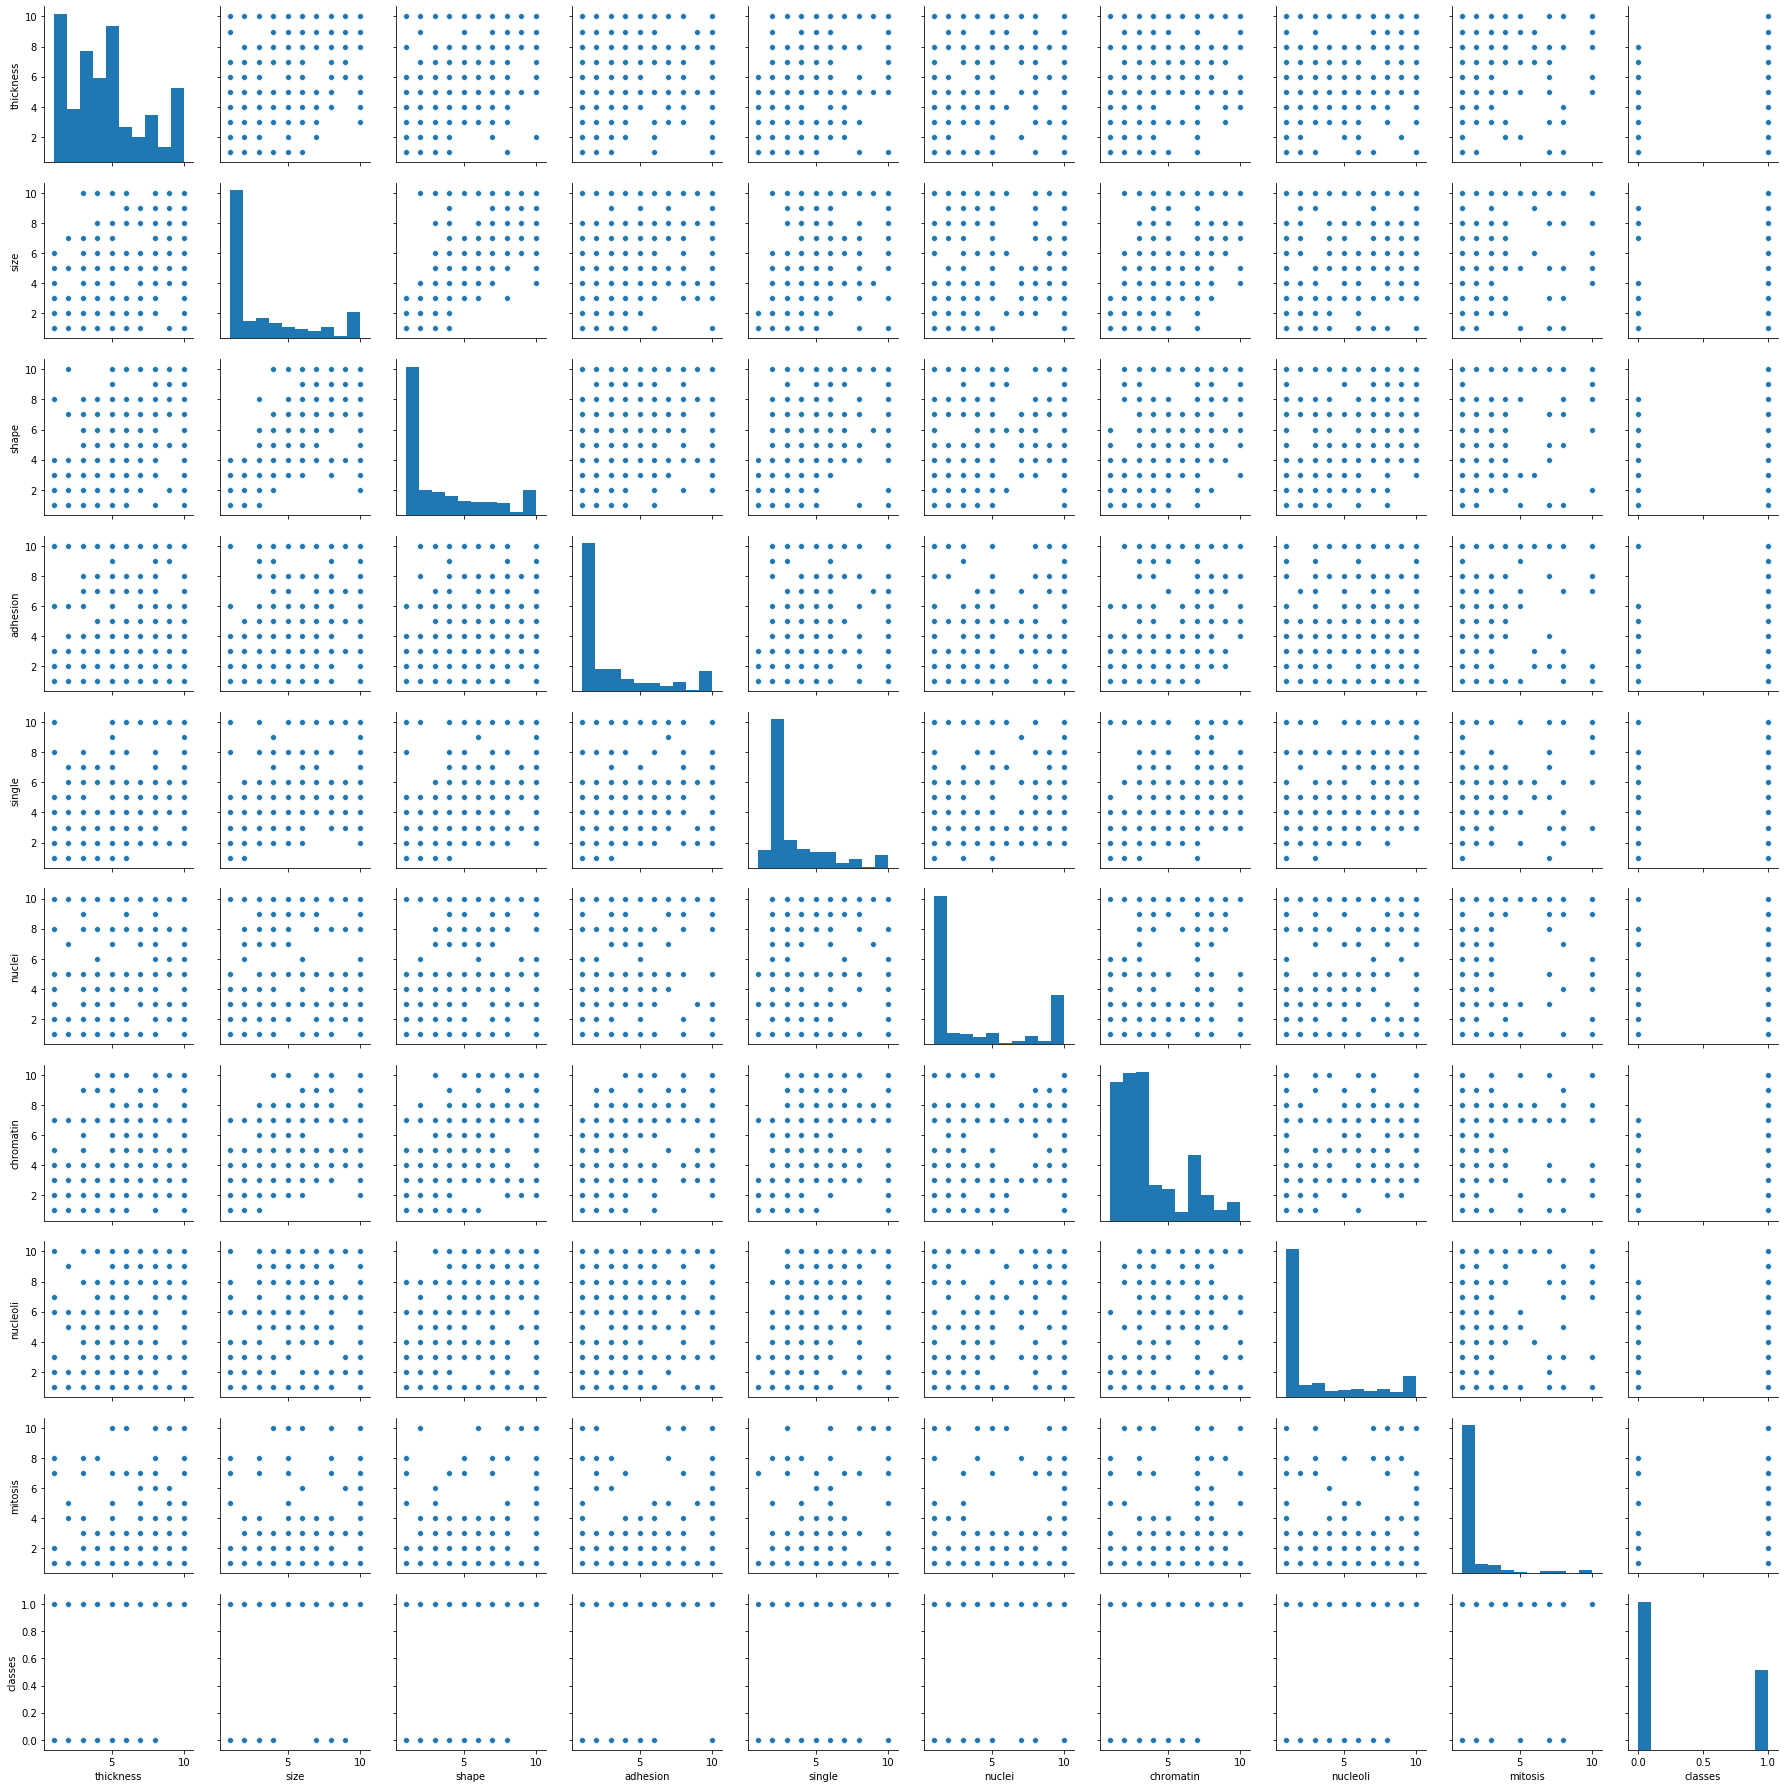

In [11]:
#finding the pair plot  for data set 1
def plot_pairplot(dfc_1,dfc_2):
    dfc_1=sns.pairplot(df_breast_cancer_data)
    dfc_2=sns.pairplot(df_breast_cancer_data_new)
plot_pairplot(df_1,df_2)

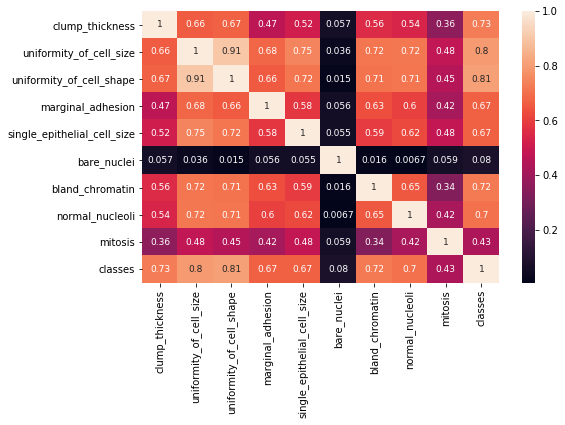

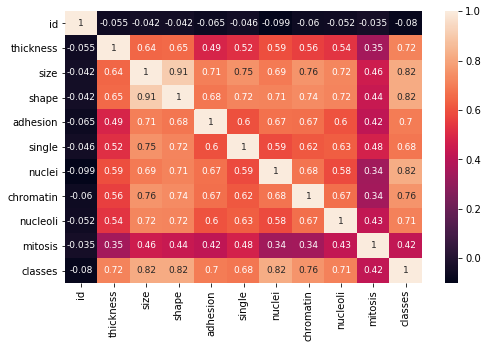

In [12]:
#finding the heatmap plot  for data set 1 and dataset2 by passing plot_heatmap fuction 
def plot_heatmap(dfc):
    fig, ax = plt.subplots(figsize = (8,5))
    sns.heatmap(data =dfc.corr() , annot = True, annot_kws = {'size' :9})
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom+0.5 , top-0.5)
    plt.show()
plot_heatmap(df_1)    
plot_heatmap(df_2)      

Select operation.
1.Boxplot
2.relplot
3.regplot
Enter values and 0 to exit
1
this chart


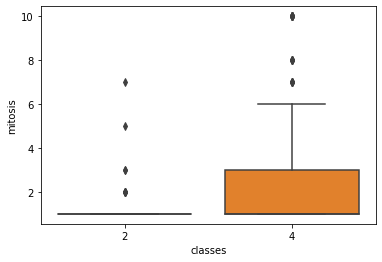

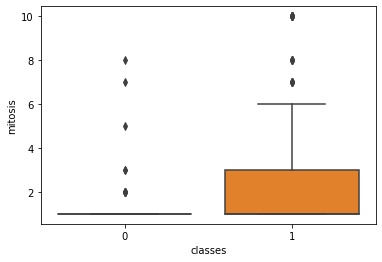

Enter values and 0 to exit
3
this chart


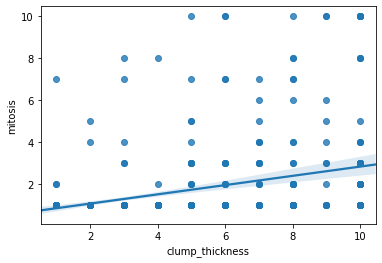

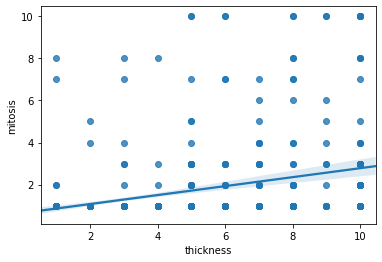

Enter values and 0 to exit
2
this chart
Enter values and 0 to exit
0


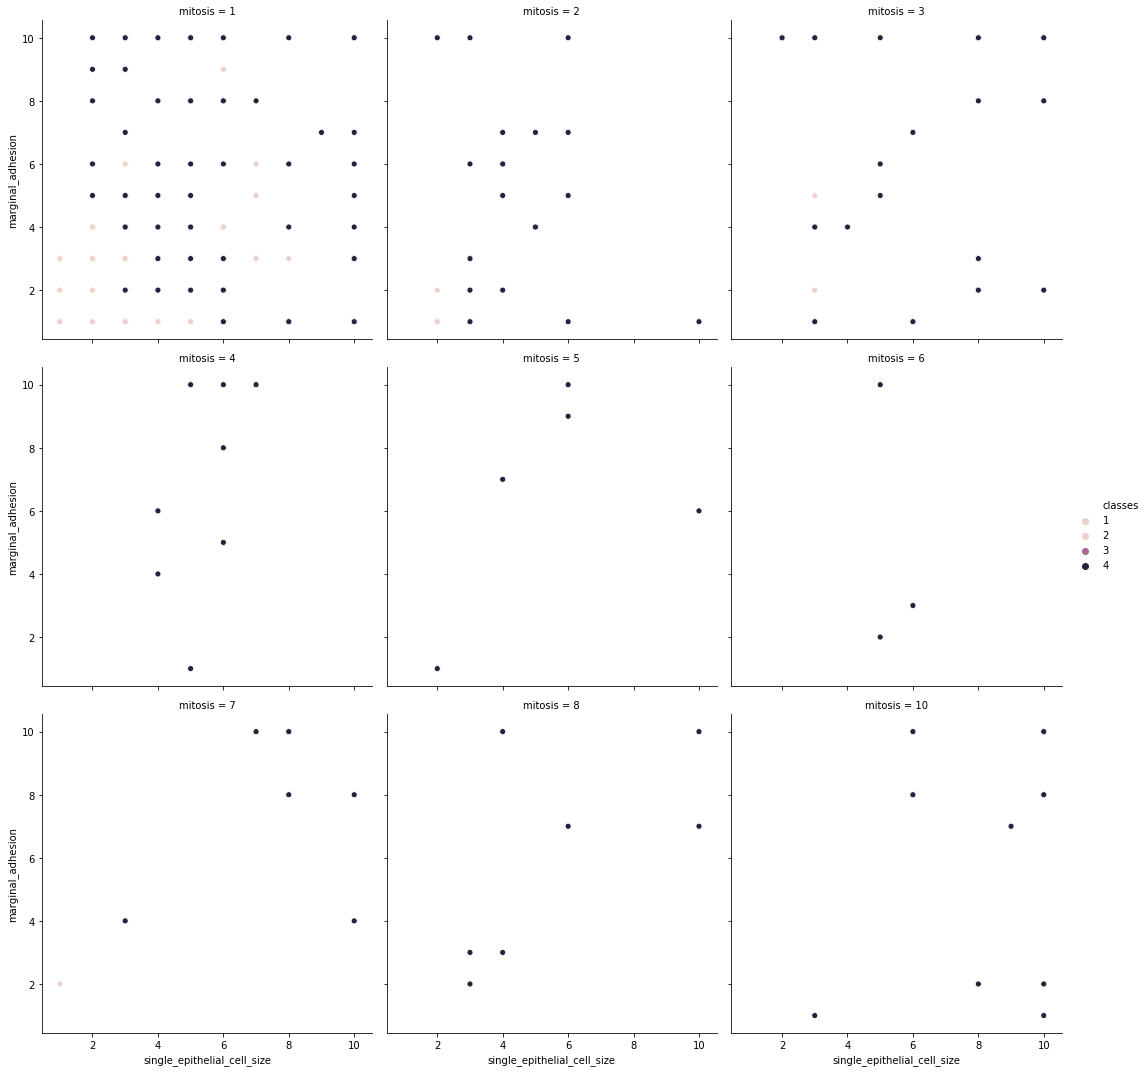

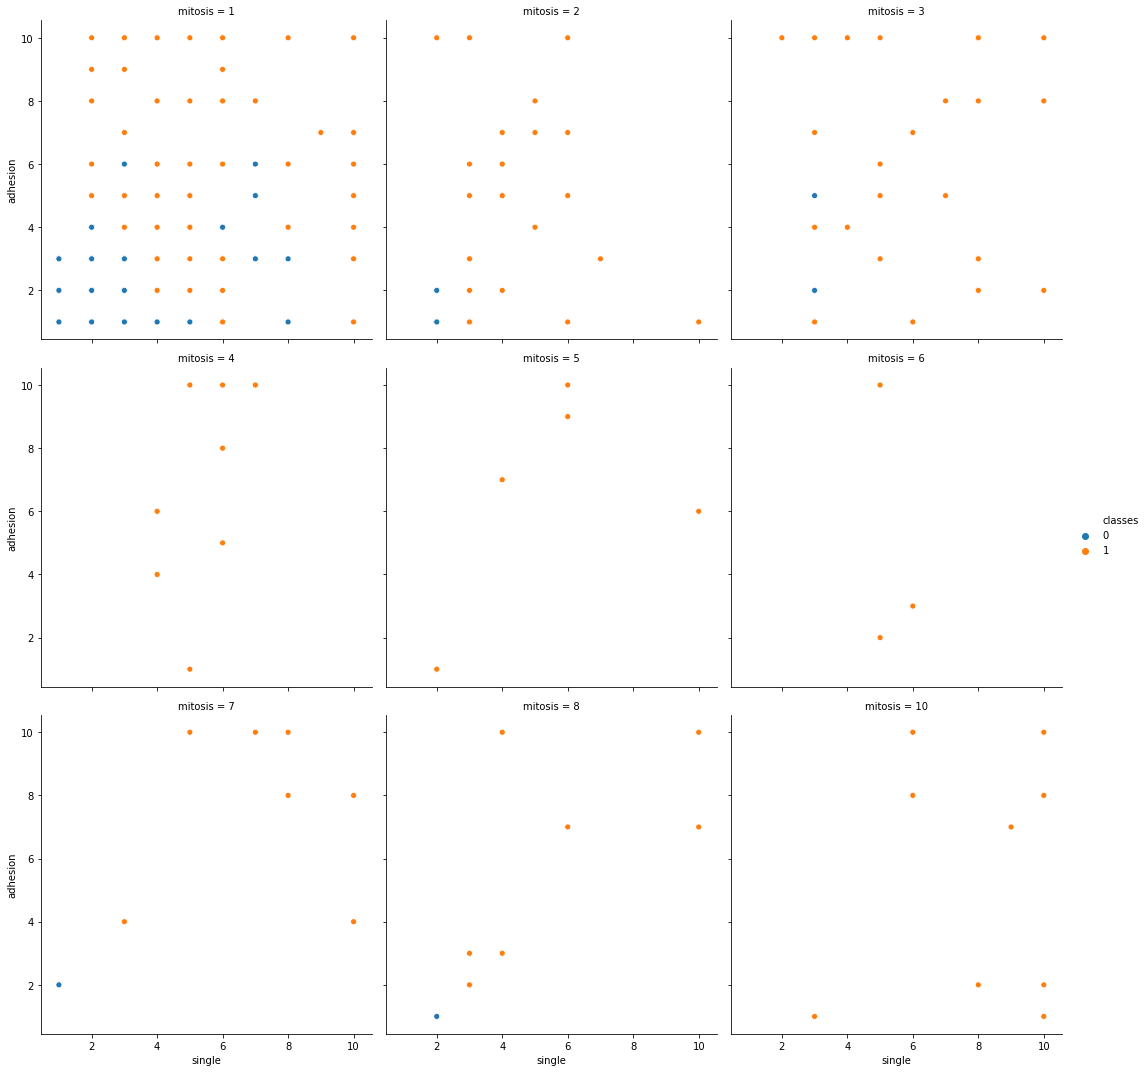

In [13]:
def boxplot(a,b):

    plt.figure()
    xx=sns.boxplot(x='classes',y= 'mitosis',data=a)#for any two column depends on user for dataset 1
    plt.figure()
    yy=sns.boxplot(x='classes',y= 'mitosis',data=b)#for any two column depends on user for dataset 2
    plt.show()



def relplot(a,b):
    aa=sns.relplot(x = 'single_epithelial_cell_size' , y = 'marginal_adhesion',col = 'mitosis' , hue = 'classes' ,col_wrap = 3,data =a)
    bb=sns.relplot(x = 'single' , y = 'adhesion',col = 'mitosis' , hue = 'classes' ,col_wrap = 3,data =b)
    print(aa)
    print(bb)



def regplot(p,q):
    plt.figure()
    pp=sns.regplot(x = 'clump_thickness' , y = 'mitosis', data = p)
    plt.figure()
    qq=sns.regplot(x = 'thickness' , y = 'mitosis', data = q)
    plt.show()

    
print("Select operation.")
print("1.Boxplot")
print("2.relplot")
print("3.regplot")


while True :
    print("Enter values and 0 to exit")
   
    val = input()
    
  
    if val == "1":
        print("this chart")
        boxplot(df_1,df_2)
        
    elif val == "2":
        print("this chart")
        relplot(df_1,df_2)
        
    elif val == "3":
        print("this chart")
        regplot(df_1,df_2)
    else:
        break
        
      
        
    




# Part 2

Compare the data sets to find the  distribution difference or similarities .

Finding  the basic statistic  from different datasets

In [14]:
def describe_statistics(stats1,stats2): # something in the menu to see user to see , put choice 
    stats1=df_breast_cancer_data.describe()
    stats2=df_breast_cancer_data_new.describe()
    print(stats1)
    print(stats2)
describe_statistics(df_1,df_2)

       clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
count       569.000000               569.000000                569.000000   
mean          4.539543                 3.184534                  3.265378   
std           2.896501                 3.002236                  2.955935   
min           1.000000                 1.000000                  1.000000   
25%           2.000000                 1.000000                  1.000000   
50%           4.000000                 1.000000                  2.000000   
75%           6.000000                 5.000000                  5.000000   
max          10.000000                10.000000                 10.000000   

       marginal_adhesion  single_epithelial_cell_size    bare_nuclei  \
count         569.000000                   569.000000     569.000000   
mean            2.845343                     3.298770   -2632.518453   
std             2.873626                     2.304775   16035.653408   
min             1.

Two find the similar columns between two datastes 

In [15]:
set(df_1.columns).intersection(set(df_2.columns)) 

{'classes', 'mitosis'}

Comparing the similar  columns between two datasets by visualising  by comparing using mean and standard deviation from different datasets  and finding skewness and kurtosis between two datasets 

In [16]:
from scipy.stats import skew
from scipy.stats import kurtosis

kurtosis :  -0.2804628587804343
skewness :  -0.30918575088783423
kurtosis :  0.08100097506721404
skewness :  -0.008510824999464123


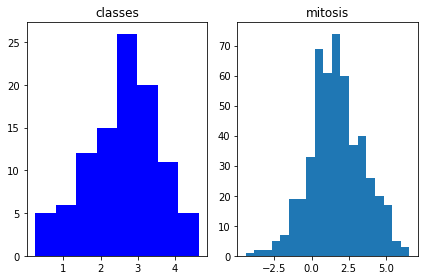

In [17]:
# for dataset 1
val_class =np.random.normal(2.7,0.96, 100) # this should be in choice but can take from the datasets . that should be  for whole datasets 
val_mitosis =np.random.normal(1.6,1.7,500)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(val_class, bins='auto' , color = 'b')
ax1.set_title('classes')
ax2.hist(val_mitosis, bins = 'auto' )
ax2.set_title('mitosis')
plt.tight_layout()
print("kurtosis : ",kurtosis(val_class))
print("skewness : ",skew(val_class))
print("kurtosis : ",kurtosis(val_mitosis))
print("skewness : ",skew(val_mitosis))

As we can see the dataset  is not normally distributed  for this sample for class column we can see the data is skewed on right side and same for the mitosis column for the dataset 1
tried to calculate normal distribution from random sample data and statistics for column class and mitosis .

kurtosis :  -0.5648012938333431
skewness :  0.29384816601998986
kurtosis :  0.05351541248272662
skewness :  -0.12522420783157567


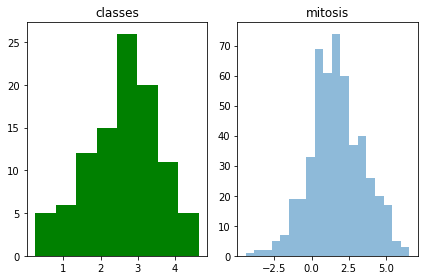

In [18]:
#for dataset 2
val_class_new =np.random.normal(0.3,0.4, 100)
val_mitosis_new=np.random.normal(1.6,1.7,500)
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(val_class, bins='auto' , color = 'g')
ax1.set_title('classes')
ax2.hist(val_mitosis, bins='auto' , alpha = 0.5)
ax2.set_title('mitosis')
plt.tight_layout()
print("kurtosis : ",kurtosis(val_class_new))
print("skewness : ",skew(val_class_new))
print("kurtosis : ",kurtosis(val_mitosis_new))
print("skewness : ",skew(val_mitosis_new))

similarly in dataset 2 this sample for class column we can see the data is skewed on right side and same for the mitosis column.
tried to calculate normal distribution from random sample data and statistics for column class and mitosis .

Dealing with non normal distribution data .

 Many tests, including the one sample Z test, T test and ANOVA assume normality.We can still be able to run these tests as sample size is large enough (usually over 20 items). 

# Part 3

Test the difference between 2 groups 

In [19]:
from scipy import stats
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind

One Sided t - test

null hypothesis : expected mean value of class =mean of column 

reject H0 if p is less than 0.5

#The p-value is a probability that measures the evidence against the null hypothesis. Smaller p-values provide stronger evidence against the null hypothesis. 

In [20]:
def onesample_ttest(t_statistic , p_value):
    mean_class1 =df_1["classes"].mean()
    mean_mitosis1=df_1["mitosis"].mean()
    mean_class2 =df_2["classes"].mean()
    mean_mitosis2=df_2["mitosis"].mean()
    t_statistic , p_value = ttest_1samp(df_1["classes"] ,mean_class1)
    t_statistic , p_value = ttest_1samp(df_1["mitosis"] ,mean_mitosis1)
    t_statistic , p_value = ttest_1samp(df_2["classes"] ,mean_class2)
    t_statistic , p_value = ttest_1samp(df_2["mitosis"] ,mean_mitosis2)
    print (" one-sample t-test_class1" , p_value)
    print (" one-sample t-test_mitosis1" , p_value)
    print (" one-sample t-test_class2" , p_value)
    print (" one-sample t-test_mitosis2" , p_value)
onesample_ttest(df_1 , df_2)   

 one-sample t-test_class1 1.0
 one-sample t-test_mitosis1 1.0
 one-sample t-test_class2 1.0
 one-sample t-test_mitosis2 1.0


Parametric Test

test for normality

In [21]:
import scipy

In [22]:
#Shapiro-test
def shapiro_test(shapiro_class1,shapiro_class2):
    shapiro_class1 =scipy.stats.shapiro(df_1["classes"] )
    shapiro_class2 = scipy.stats.shapiro(df_2["classes"] )
    shapiro_mitosis1 = scipy.stats.shapiro(df_1["mitosis"] )
    shapiro_mitosis2 = scipy.stats.shapiro(df_2["mitosis"] )
    print(shapiro_class1)
    print(shapiro_class2)
    print(shapiro_mitosis1)
    print(shapiro_mitosis2)
shapiro_test(df_1,df_2) # user based which column user wanted to see 

(0.6097162961959839, 7.217476539331304e-34)
(0.6005393862724304, 3.1774509940891515e-37)
(0.4132397770881653, 2.7812817777087893e-39)
(0.39283454418182373, 4.091791515828466e-43)


#Reject H0

Non-Parametric tests

Two sample T-test

null hypothesis : the two groups have the same mean 

In [23]:
#two sample t test 
def twosample_ttest(t_statistic , p_value):
    t_statistic , p_value = ttest_ind(df_1["mitosis"] ,df_2["mitosis"])
    print("two-sample t-test" , p_value)
twosample_ttest(df_1 ,df_2)

two-sample t-test 0.6216352827849838


In [24]:
#Wilcoxon test 
def wilcoxon_test(z_statistic, p_value):
    z_statistic, p_value = wilcoxon(df_1["classes"] - df_2["classes"])
    print("paired wilcoxon-test " , p_value)
wilcoxon_test(df_1,df_2)

paired wilcoxon-test  5.607795651319279e-121


C:\Users\raj\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2866: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
C:\Users\raj\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2867: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Test the difference between 2 groups or more groups

Anova

In [25]:
#Anova test 
def anova_test(F,F1):
    F,p=stats.f_oneway(df_1['classes'], df_1['mitosis'] )
    F1,p_value =stats.f_oneway(df_2['classes'], df_2['mitosis'] )
    print('anova1' , p)
    print('anova2' , p_value)
anova_test(df_1,df_2)



anova1 1.0495274905380657e-35
anova2 1.9303330232178426e-68


In [26]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

In [27]:
#taking model variale  and puting ols (ordinary least square )
def anova_table(mod,model):
    model = ols('classes ~ mitosis' , data = df_1).fit()    #  check wether the classes are different across mitosis values 
    aov_table = sm.stats.anova_lm(model , typ=2)# type = 2 means two way anova .
    mod = ols('classes ~ mitosis' , data = df_2).fit()    #  check wether the classes are different across mitosis values 
    aov_table1 = sm.stats.anova_lm(mod , typ=2)# type = 2 means one way anova .
    print (aov_table)
    print (aov_table1)
anova_table(df_1,df_2)
    

              sum_sq     df           F        PR(>F)
mitosis    98.975706    1.0  130.849519  2.087067e-27
Residual  428.883696  567.0         NaN           NaN
              sum_sq     df           F        PR(>F)
mitosis    28.277149    1.0  152.040239  9.682098e-32
Residual  129.631292  697.0         NaN           NaN


In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison 

In [29]:
#passing fuction tukeyhsd_test  to find multicomparison mean between two groups of different datasets .
def tukeyhsd_test(mc1,mc2):
    mc1  = MultiComparison(df_1['classes'], df_1['mitosis'])
    mc2  = MultiComparison(df_2['classes'], df_2['mitosis'])
    result1 = mc1.tukeyhsd()
    result2 = mc2.tukeyhsd()
    print (result1)
    print (result2)
    print(mc1.groupsunique)
    print(mc2.groupsunique)
tukeyhsd_test(df_1,df_2)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   1.0959  0.001  0.6066 1.5852   True
     1      3   1.3615  0.001  0.8554 1.8676   True
     1      4   1.5097  0.001  0.7622 2.2572   True
     1      5   1.1763 0.0153  0.1259 2.2268   True
     1      6   1.5097 0.0418  0.0289 2.9905   True
     1      7   1.2597  0.001   0.348 2.1713   True
     1      8   1.5097  0.001  0.5361 2.4832   True
     1     10   1.5097  0.001  0.7622 2.2572   True
     2      3   0.2656    0.9 -0.4181 0.9494  False
     2      4   0.4138 0.8587 -0.4637 1.2913  False
     2      5   0.0805    0.9 -1.0662 1.2271  False
     2      6   0.4138    0.9 -1.1367 1.9643  False
     2      7   0.1638    0.9 -0.8572 1.1848  False
     2      8   0.4138    0.9 -0.6628 1.4904  False
     2     10   0.4138 0.8587 -0.4637 1.2913  False
     3      4   0.1481    0.9 -0.7389 1.0352  False
     3      